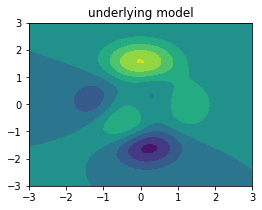

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import numpy as np
import itertools

from sumomo import api
from utils import peaks, plot_peaks, func_1d, plot_1d, plot_triangles


plot_peaks()

In [2]:
api.initialise(4, [(-3.0, 3.0), (-3.0, 3.0)])

api.x = np.array(list(itertools.product(*api.space)))

for i in range(api.x.shape[0]):
    api.y[i] = peaks(api.x[i])

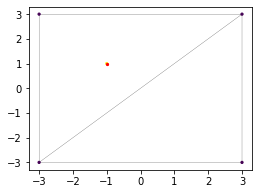

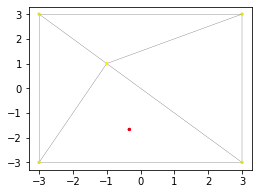

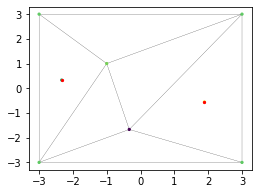

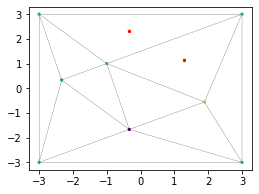

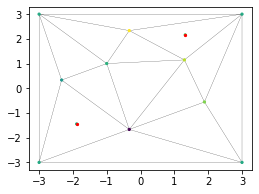

In [3]:
for i in range(5):

    explore_sample = api.delaunay_explore()
    exploit_sample = api.delaunay_exploit(sense='max')

    new = np.r_[[explore_sample], [exploit_sample]]
    new = np.unique(new, axis=0)

    for i in range(new.shape[0]):
        api.x = np.r_[api.x, [new[i]]]
        api.y = np.r_[api.y, peaks(new[i]).reshape(-1, 1)]
    
    plot_triangles(api, new)

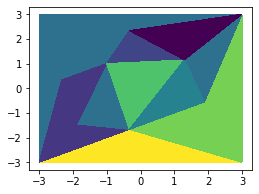

In [4]:
sizes = api._get_delaunay_centroids_and_sizes()[1]

import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.tripcolor(api.delaunay.points[:, 0], api.delaunay.points[:, 1], api.delaunay.simplices, facecolors=sizes)

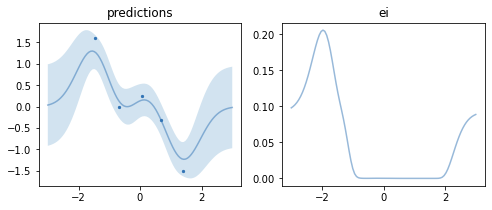

In [5]:
api.initialise(5, [(-3.0, 3.0)], 1, 'lhs')
for i in range(api.x.shape[0]):
    api.y[i] = func_1d(api.x[i])

api.scale()
api.init_regressor('gp', noise=0.2)

with np.errstate(divide='ignore'):
    api.regressor.fit(api.x_, api.y_)

api.new = api.max_expected_improvement(aquisition='ei')

plot_1d(api)